In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
import cv2 
import os 

In [3]:
# data_path= './output'
data_path = './output_cre'

In [4]:
def get_list_files(dirName):
    file_list=os.listdir(dirName)
    return file_list

In [5]:
data_path+'/'+get_list_files(data_path)[0]

'./output_cre/Circle_000dfc5c-2a92-11ea-8123-8363a7ec19e6.png'

In [6]:
len(get_list_files(data_path))

900

In [7]:
def crop_img(img,a):
    mask = img!=a
    mask = mask.any(2)
    mask0, mask1 = mask.any(0), mask.any(1)
#     print(mask1)
    colstart, colend = mask0.argmax(), len(mask0) - mask0[::-1].argmax()+1
    rowstart, rowend = mask1.argmax(), len(mask1) - mask1[::-1].argmax()+1
    return img[rowstart:rowend, colstart:colend]

In [8]:
class_name =['Tri', 'Squ', 'Pen', 'Hex', 'Hep', 'Oct', 'Non', 'Cir', 'Sta']#9

In [66]:
from skimage.feature import hog
from skimage import exposure
import imutils

target = []
images = []
flat_data =[]

path=os.path.join(data_path)
i=0
for img in os.listdir(path):

    #input img
        imgBGR = cv2.imread(os.path.join(path,img))
        imgRGB = cv2.cvtColor(imgBGR,cv2.COLOR_BGR2RGB)
#         plt.imshow(imgRGB)
#         plt.show()
        
        #crop_img
        a = imgRGB[0]
        img_crop=crop_img(imgRGB,a)
#         plt.imshow(img_crop)
#         plt.show()
        
        img_cropGray=cv2.cvtColor(img_crop,cv2.COLOR_RGB2GRAY)
        img_cropGray = cv2.resize(img_cropGray,(100,100))
        img_cropGray = np.array(img_cropGray,dtype=np.float64)/255
#         plt.imshow(img_cropGray)
#         plt.show()
        
        #HOG
        fd, hogImage = hog(img_cropGray, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True,block_norm="L2")
        flat_data.append(fd.flatten())

        hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
        hogImage = hogImage.astype("uint8")
#         plt.imshow(hogImage)
#         plt.show
        

        #target
        path_class = os.path.join(path,img)[13:16]
        target.append(class_name.index(path_class))
        
#         break
        
flat_data = np.array(flat_data)
target = np.array(target)

<BarContainer object of 9 artists>

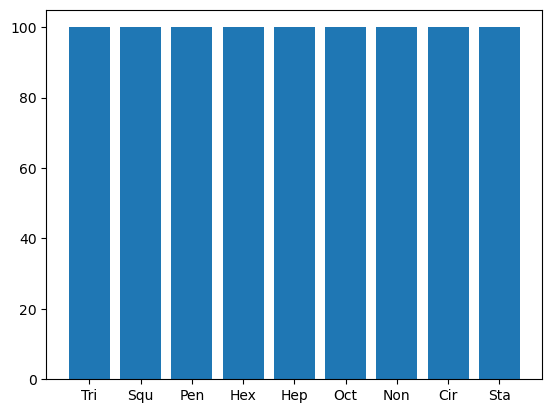

In [55]:
unique,count = np.unique(target,return_counts=True)
plt.bar(class_name,count)

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(flat_data,target,test_size=0.3)

In [71]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(x_train,y_train)

RandomForestClassifier()

In [72]:
y_pred=model1.predict(x_test)
model1.score(x_test,y_test)

0.9666666666666667

In [73]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()
model2.fit(x_train,y_train)
y_pred=model2.predict(x_test)
model2.score(x_test,y_test)

0.9888888888888889

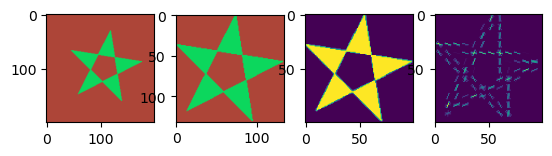

In [74]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4)
imgBGR = cv2.imread(os.path.join(path,'Star_000cf8ca-2a88-11ea-8123-8363a7ec19e6.png'))
imgRGB = cv2.cvtColor(imgBGR,cv2.COLOR_BGR2RGB)
ax1.imshow(imgRGB)

a = imgRGB[0]
img_crop=crop_img(imgRGB,a)
ax2.imshow(img_crop)

img_cropGray=cv2.cvtColor(img_crop,cv2.COLOR_RGB2GRAY)
img_cropGray = cv2.resize(img_cropGray,(100,100))
img_cropGray = np.array(img_cropGray,dtype=np.float64)/255
ax3.imshow(img_cropGray)
#HOG
fd, hogImage = hog(img_cropGray, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True,block_norm="L2")

hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
hogImage = hogImage.astype("uint8")
ax4.imshow(hogImage)

